In [1]:
import os

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

import time
from catboost import CatBoostClassifier, CatBoostRegressor, Pool, cv
import pickle
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import shap

In [2]:
os.getcwd()

'/Users/marcin/Documents/VIMSS/COVID/ecointeractions'

In [3]:
shap.initjs()

In [4]:
random_seed = 123

print("start")

dataframe_list_list = np.empty((10, 5)).tolist()


start


In [6]:
df_eco = pd.read_csv('./Datasets/Microbes_only_Combined_cal_ifr_01.csv', sep=',', index_col=0, encoding='utf-8')
print(df_eco.head())

    FIPS  unclassified_indoor_fungi  \
1  35001                       3445   
2  35001                       3081   
3  35001                       5112   
4  35001                       2513   
5  35001                       3523   

   k__Fungi.p__Ascomycota.c__Eurotiomycetes.o__Eurotiales.f__Trichocomaceae.g__Aspergillus_indoor  \
1                                                 17                                                
2                                                 36                                                
3                                                380                                                
4                                                 14                                                
5                                                 18                                                

   k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Capnodiales.f__Incertae.sedis.g__Toxicocladosporium_indoor  \
1                                               

In [8]:
for i in range(0, 10):
    for j in range(0, 5):
        dataframe_list_list[i][j] = pd.read_csv('./CV_Sets/Microbes_only_Combined/Set_'+str(i+1)+'/Fold_'+str(j+1)+'.csv', sep=',', index_col=0, encoding='utf-8')
        #print(df_cur.head())
        

In [9]:
type(dataframe_list_list[0][0].columns.values)

numpy.ndarray

In [10]:
dataframe_list_list[1][1]['Set_Type'].head()

35    Training
36    Training
94    Training
95    Training
96    Training
Name: Set_Type, dtype: object

In [11]:
dataframe_list_list[1][1][dataframe_list_list[1][1]['Set_Type'] == 'Training'].head()

,FIPS,unclassified_indoor_fungi,k__Fungi.p__Ascomycota.c__Eurotiomycetes.o__Eurotiales.f__Trichocomaceae.g__Aspergillus_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Capnodiales.f__Incertae.sedis.g__Toxicocladosporium_indoor,k__Fungi.p__Ascomycota.c__unidentified.o__unidentified.f__unidentified.g__unidentified_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Incertae.sedis.g__Phoma_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Pleosporaceae.g__Alternaria_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Dothideales.f__Dothioraceae.g__Aureobasidium_indoor,k__Fungi.p__Basidiomycota.c__Microbotryomycetes.o__Sporidiobolales.f__Incertae.sedis.g__Sporobolomyces_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__unidentified.g__unidentified_indoor,...,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacteriales.f__Enterobacteriaceae.g__Serratia_outdoor_shuffled,k__Bacteria.p__Actinobacteria.c__Actinobacteria.o__Actinomycetales.f__Microbacteriaceae.g__Salinibacterium_outdoor_shuffled,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiaceae.g__SMB53_outdoor_shuffled,k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhizobiales.f__Phyllobacteriaceae.g__Mesorhizobium_outdoor_shuffled,k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhizobiales.f__Bradyrhizobiaceae.g__Bradyrhizobium_outdoor_shuffled,BRAY_CURTIS_bacteria_shuffled,BETA_J_bacteria_shuffled,FRACTION_OUTDOOR_TAXA_bacteria_shuffled,IFR,Set_Type
35,54039,1695,2092,133,8,49,140,7,16,251,...,7,1,28,0,6,0.551592,0.735751,0.605839,0.005299,Training
36,54039,3279,330,65,77,306,326,95,15,116,...,94,3,0,0,4,0.714331,0.680135,0.467742,0.005299,Training
94,34025,2263,68,482,274,77,406,150,117,50,...,121,2,7,4,0,0.420311,0.824841,0.514706,0.006344,Training
95,34025,1510,93,5,8,1523,183,138,7,15,...,99,0,4,0,2,0.587694,0.918644,0.307407,0.006344,Training
96,34025,2780,109,53,120,430,319,157,19,133,...,47,0,8,0,1,0.501957,0.403333,0.700000,0.006344,Training


In [12]:
dataframe_list_list_orig = dataframe_list_list

In [13]:
dataframe_list_list_orig[1][1].head()

,FIPS,unclassified_indoor_fungi,k__Fungi.p__Ascomycota.c__Eurotiomycetes.o__Eurotiales.f__Trichocomaceae.g__Aspergillus_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Capnodiales.f__Incertae.sedis.g__Toxicocladosporium_indoor,k__Fungi.p__Ascomycota.c__unidentified.o__unidentified.f__unidentified.g__unidentified_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Incertae.sedis.g__Phoma_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Pleosporaceae.g__Alternaria_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Dothideales.f__Dothioraceae.g__Aureobasidium_indoor,k__Fungi.p__Basidiomycota.c__Microbotryomycetes.o__Sporidiobolales.f__Incertae.sedis.g__Sporobolomyces_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__unidentified.g__unidentified_indoor,...,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacteriales.f__Enterobacteriaceae.g__Serratia_outdoor_shuffled,k__Bacteria.p__Actinobacteria.c__Actinobacteria.o__Actinomycetales.f__Microbacteriaceae.g__Salinibacterium_outdoor_shuffled,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiaceae.g__SMB53_outdoor_shuffled,k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhizobiales.f__Phyllobacteriaceae.g__Mesorhizobium_outdoor_shuffled,k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhizobiales.f__Bradyrhizobiaceae.g__Bradyrhizobium_outdoor_shuffled,BRAY_CURTIS_bacteria_shuffled,BETA_J_bacteria_shuffled,FRACTION_OUTDOOR_TAXA_bacteria_shuffled,IFR,Set_Type
35,54039,1695,2092,133,8,49,140,7,16,251,...,7,1,28,0,6,0.551592,0.735751,0.605839,0.005299,Training
36,54039,3279,330,65,77,306,326,95,15,116,...,94,3,0,0,4,0.714331,0.680135,0.467742,0.005299,Training
94,34025,2263,68,482,274,77,406,150,117,50,...,121,2,7,4,0,0.420311,0.824841,0.514706,0.006344,Training
95,34025,1510,93,5,8,1523,183,138,7,15,...,99,0,4,0,2,0.587694,0.918644,0.307407,0.006344,Training
96,34025,2780,109,53,120,430,319,157,19,133,...,47,0,8,0,1,0.501957,0.403333,0.700000,0.006344,Training


In [14]:
dataframe_list_list = dataframe_list_list_orig
train_X_list_list =  np.empty((10, 5)).tolist()
test_X_list_list =  np.empty((10, 5)).tolist()
train_y_list_list =  np.empty((10, 5)).tolist()
test_y_list_list =  np.empty((10, 5)).tolist()

for i in range(0, 10):
    for j in range(0, 5):
        print(str(i)+"\t"+str(j))

        df_cur = dataframe_list_list[i][j] 
        #df_cur = df_cur.drop(['FIPS'], axis=1)
        #df_cur = df_cur.drop(['Set_Type'], axis=1)
        y = df_cur['IFR']
        #print(y)

        print("df_cur "+str(df_cur.shape))

        #X = df_cur#.iloc[:,:-1]
        #X.drop(['FIPS'], axis=1, inplace=True)
        #print(X.columns)
        #print("X "+str(X.shape))
        X_train = df_cur[dataframe_list_list[i][j]['Set_Type'] == 'Training'] 
        X_test = df_cur[dataframe_list_list[i][j]['Set_Type'] == 'Test']
        y_train = df_cur[dataframe_list_list[i][j]['Set_Type'] == 'Training']['IFR']
        y_test = df_cur[dataframe_list_list[i][j]['Set_Type'] == 'Test']['IFR']
        print("shapes "+str(X_train.shape)+"\t"+str(X_test.shape)+"\t"+str(y_train.shape)+"\t"+str(y_test.shape))
        
        #print(y_train)
        X_train.drop(['Set_Type'], axis=1, inplace=True)
        X_train.drop(['FIPS'], axis=1, inplace=True)
        X_train.drop(['IFR'], axis=1, inplace=True)
        X_test.drop(['Set_Type'], axis=1, inplace=True)
        X_test.drop(['FIPS'], axis=1, inplace=True)
        X_test.drop(['IFR'], axis=1, inplace=True)

        print("train label deficit:",len(set(y)-set(y_train)),"test label deficit:",len(set(y)-set(y_test)))

        print("shapes "+str(X_train.shape)+"\t"+str(X_test.shape)+"\t"+str(y_train.shape)+"\t"+str(y_test.shape))

        #train_dataset = Pool(X_train, y_train)
        #test_dataset = Pool(X_test, y_test)
        train_X_list_list[i][j] = X_train
        test_X_list_list[i][j] = X_test
        train_y_list_list[i][j] = y_train
        test_y_list_list[i][j] = y_test

0	0
df_cur (989, 339)
shapes (801, 339)	(188, 339)	(801,)	(188,)
train label deficit: 90 test label deficit: 362
shapes (801, 336)	(188, 336)	(801,)	(188,)
0	1
df_cur (989, 339)
shapes (784, 339)	(205, 339)	(784,)	(205,)
train label deficit: 89 test label deficit: 363
shapes (784, 336)	(205, 336)	(784,)	(205,)
0	2
df_cur (989, 339)
shapes (789, 339)	(200, 339)	(789,)	(200,)
train label deficit: 82 test label deficit: 370
shapes (789, 336)	(200, 336)	(789,)	(200,)
0	3
df_cur (989, 339)
shapes (772, 339)	(217, 339)	(772,)	(217,)
train label deficit: 97 test label deficit: 356
shapes (772, 336)	(217, 336)	(772,)	(217,)
0	4
df_cur (989, 339)
shapes (810, 339)	(179, 339)	(810,)	(179,)
train label deficit: 94 test label deficit: 358
shapes (810, 336)	(179, 336)	(810,)	(179,)
1	0
df_cur (989, 339)
shapes (791, 339)	(198, 339)	(791,)	(198,)
train label deficit: 96 test label deficit: 356
shapes (791, 336)	(198, 336)	(791,)	(198,)
1	1
df_cur (989, 339)
shapes (826, 339)	(163, 339)	(826,)	(163,)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


 100 test label deficit: 352
shapes (771, 336)	(218, 336)	(771,)	(218,)
3	3
df_cur (989, 339)
shapes (812, 339)	(177, 339)	(812,)	(177,)
train label deficit: 89 test label deficit: 363
shapes (812, 336)	(177, 336)	(812,)	(177,)
3	4
df_cur (989, 339)
shapes (800, 339)	(189, 339)	(800,)	(189,)
train label deficit: 82 test label deficit: 371
shapes (800, 336)	(189, 336)	(800,)	(189,)
4	0
df_cur (989, 339)
shapes (805, 339)	(184, 339)	(805,)	(184,)
train label deficit: 79 test label deficit: 373
shapes (805, 336)	(184, 336)	(805,)	(184,)
4	1
df_cur (989, 339)
shapes (776, 339)	(213, 339)	(776,)	(213,)
train label deficit: 88 test label deficit: 364
shapes (776, 336)	(213, 336)	(776,)	(213,)
4	2
df_cur (989, 339)
shapes (790, 339)	(199, 339)	(790,)	(199,)
train label deficit: 82 test label deficit: 371
shapes (790, 336)	(199, 336)	(790,)	(199,)
4	3
df_cur (989, 339)
shapes (807, 339)	(182, 339)	(807,)	(182,)
train label deficit: 96 test label deficit: 356
shapes (807, 336)	(182, 336)	(807,)

In [15]:
train_X_list_list[i][j].head()

,unclassified_indoor_fungi,k__Fungi.p__Ascomycota.c__Eurotiomycetes.o__Eurotiales.f__Trichocomaceae.g__Aspergillus_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Capnodiales.f__Incertae.sedis.g__Toxicocladosporium_indoor,k__Fungi.p__Ascomycota.c__unidentified.o__unidentified.f__unidentified.g__unidentified_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Incertae.sedis.g__Phoma_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Pleosporaceae.g__Alternaria_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Dothideales.f__Dothioraceae.g__Aureobasidium_indoor,k__Fungi.p__Basidiomycota.c__Microbotryomycetes.o__Sporidiobolales.f__Incertae.sedis.g__Sporobolomyces_indoor,k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__unidentified.g__unidentified_indoor,k__Fungi.p__Basidiomycota.c__Tremellomycetes.o__Filobasidiales.f__Filobasidiaceae.g__Cryptococcus_indoor,...,k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhizobiales.f__Bradyrhizobiaceae.g__Balneimonas_outdoor_shuffled,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacteriales.f__Enterobacteriaceae.g__Pantoea_outdoor_shuffled,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacteriales.f__Enterobacteriaceae.g__Serratia_outdoor_shuffled,k__Bacteria.p__Actinobacteria.c__Actinobacteria.o__Actinomycetales.f__Microbacteriaceae.g__Salinibacterium_outdoor_shuffled,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiaceae.g__SMB53_outdoor_shuffled,k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhizobiales.f__Phyllobacteriaceae.g__Mesorhizobium_outdoor_shuffled,k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhizobiales.f__Bradyrhizobiaceae.g__Bradyrhizobium_outdoor_shuffled,BRAY_CURTIS_bacteria_shuffled,BETA_J_bacteria_shuffled,FRACTION_OUTDOOR_TAXA_bacteria_shuffled
94,2263,68,482,274,77,406,150,117,50,59,...,0,196,121,2,7,4,0,0.420311,0.824841,0.514706
95,1510,93,5,8,1523,183,138,7,15,15,...,1,13,99,0,4,0,2,0.587694,0.918644,0.307407
96,2780,109,53,120,430,319,157,19,133,28,...,12,5,47,0,8,0,1,0.501957,0.403333,0.700000
97,4375,325,0,48,11,572,19,95,87,75,...,160,9,3,0,2,7,0,0.344561,0.560150,0.347368
98,2226,522,21,96,347,633,100,44,269,56,...,11,77,175,1,0,18,0,0.541291,0.936667,0.710317


In [17]:
modelstart = time.time()

train_dataset = Pool(train_X_list_list[i][j], train_y_list_list[i][j])

print(f"Starting search at {modelstart}")
cb_model = CatBoostRegressor(loss_function='MAE',
                             iterations = 1000,
                             verbose = 5,
                             learning_rate = 0.1,
                             depth = 3,
                             l2_leaf_reg = 0.5,
                             eval_metric = 'R2',
                             random_seed = random_seed,
                             bagging_temperature = 0.2,
                             od_type = 'Iter',
                             od_wait = 100
)

grid = {#'iterations': [100, 150, 200],
       'learning_rate': [0.01, 0.1, 0.2],
        'depth': [6,7,8],
        'l2_leaf_reg': [0.1, 1, 2],
        'random_strength': [0, 0.1, 0.5],
        'bagging_temperature': [0.0001, 0.01, 0.1]}
grid_search_result = cb_model.grid_search(grid, train_dataset)

lr = grid_search_result['params']['learning_rate']
de = grid_search_result['params']['depth']
l2 = grid_search_result['params']['l2_leaf_reg']
rs = grid_search_result['params']['random_strength']
bg = grid_search_result['params']['bagging_temperature']
print(f"Trained grid search in {time.time() - modelstart}s")
print("lr "+str(lr)+", de "+str(de)+", l2 "+str(l2)+", rs "+str(rs)+", bg "+str(bg))

Starting search at 1616024107.97728

bestTest = 0.08470206547
bestIteration = 953

0:	loss: 0.0847021	best: 0.0847021 (0)	total: 12.8s	remaining: 51m 30s
Stopped by overfitting detector  (100 iterations wait)

bestTest = -0.005297628191
bestIteration = 80

1:	loss: -0.0052976	best: 0.0847021 (0)	total: 15.2s	remaining: 30m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = -0.001310218169
bestIteration = 11

2:	loss: -0.0013102	best: 0.0847021 (0)	total: 16.7s	remaining: 22m 17s

bestTest = 0.1036940021
bestIteration = 963

3:	loss: 0.1036940	best: 0.1036940 (3)	total: 30.5s	remaining: 30m 21s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.05911831557
bestIteration = 258

4:	loss: 0.0591183	best: 0.1036940 (3)	total: 35.5s	remaining: 28m 11s
Stopped by overfitting detector  (100 iterations wait)

bestTest = -0.02761312171
bestIteration = 46

5:	loss: -0.0276131	best: 0.1036940 (3)	total: 37.6s	remaining: 24m 45s

bestTest = 0.06175975544
bestIt


bestTest = 0.07708099929
bestIteration = 995

51:	loss: 0.0770810	best: 0.1039085 (38)	total: 7m 9s	remaining: 26m 17s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.03415883626
bestIteration = 32

52:	loss: 0.0341588	best: 0.1039085 (38)	total: 7m 12s	remaining: 25m 51s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.001076825054
bestIteration = 23

53:	loss: 0.0010768	best: 0.1039085 (38)	total: 7m 15s	remaining: 25m 25s

bestTest = 0.05855963104
bestIteration = 990

54:	loss: 0.0585596	best: 0.1039085 (38)	total: 7m 57s	remaining: 27m 11s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.01276446638
bestIteration = 47

55:	loss: 0.0127645	best: 0.1039085 (38)	total: 8m 3s	remaining: 26m 55s
Stopped by overfitting detector  (100 iterations wait)

bestTest = -0.03229535024
bestIteration = 26

56:	loss: -0.0322954	best: 0.1039085 (38)	total: 8m 9s	remaining: 26m 36s
Stopped by overfitting detector  (100 iterations wait)

be


bestTest = 0.05451825701
bestIteration = 994

102:	loss: 0.0545183	best: 0.1039085 (38)	total: 18m 40s	remaining: 25m 23s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.05908778505
bestIteration = 80

103:	loss: 0.0590878	best: 0.1039085 (38)	total: 18m 44s	remaining: 25m 2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.0313244838
bestIteration = 50

104:	loss: 0.0313245	best: 0.1039085 (38)	total: 18m 46s	remaining: 24m 40s

bestTest = 0.06966810871
bestIteration = 916

105:	loss: 0.0696681	best: 0.1039085 (38)	total: 19m 2s	remaining: 24m 36s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.04794787867
bestIteration = 113

106:	loss: 0.0479479	best: 0.1039085 (38)	total: 19m 7s	remaining: 24m 17s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.02050040049
bestIteration = 13

107:	loss: 0.0205004	best: 0.1039085 (38)	total: 19m 8s	remaining: 23m 56s
Stopped by overfitting detector  (100 iterations w

Stopped by overfitting detector  (100 iterations wait)

bestTest = -0.03787363405
bestIteration = 20

152:	loss: -0.0378736	best: 0.1039085 (38)	total: 29m 30s	remaining: 17m 21s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.06345921072
bestIteration = 856

153:	loss: 0.0634592	best: 0.1039085 (38)	total: 30m 11s	remaining: 17m 26s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.01536008049
bestIteration = 80

154:	loss: 0.0153601	best: 0.1039085 (38)	total: 30m 19s	remaining: 17m 12s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.05855129997
bestIteration = 37

155:	loss: 0.0585513	best: 0.1039085 (38)	total: 30m 25s	remaining: 16m 57s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.06265941149
bestIteration = 797

156:	loss: 0.0626594	best: 0.1039085 (38)	total: 31m 1s	remaining: 16m 59s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.06071547914
bestIteration = 80

157:	loss: 

Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.02929158533
bestIteration = 44

202:	loss: 0.0292916	best: 0.1039085 (38)	total: 37m 10s	remaining: 7m 21s
Stopped by overfitting detector  (100 iterations wait)

bestTest = -0.003283697027
bestIteration = 47

203:	loss: -0.0032837	best: 0.1039085 (38)	total: 37m 13s	remaining: 7m 9s

bestTest = 0.08296788409
bestIteration = 937

204:	loss: 0.0829679	best: 0.1039085 (38)	total: 37m 36s	remaining: 7m
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.03217238837
bestIteration = 44

205:	loss: 0.0321724	best: 0.1039085 (38)	total: 37m 39s	remaining: 6m 47s
Stopped by overfitting detector  (100 iterations wait)

bestTest = -0.01040595401
bestIteration = 16

206:	loss: -0.0104060	best: 0.1039085 (38)	total: 37m 42s	remaining: 6m 35s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.07602598472
bestIteration = 778

207:	loss: 0.0760260	best: 0.1039085 (38)	total: 38m 3s	remaining: 6m 26

In [18]:
#lr = 0.08
#de = 4
#l2 = 10
#bg = 100
models_list =  np.empty((10, 5)).tolist()
sorted_feature_importance_list =  np.empty((10, 5)).tolist()
R2_list =  np.empty((10, 0)).tolist()
for i in range(0, 10):
    for j in range(0, 5):
        print(str(i)+"\t"+str(j))
        cb_model = CatBoostRegressor(loss_function='MAE',
                             iterations = 1000,
                             verbose = 0,
                             learning_rate = lr,
                             depth = de,
                             l2_leaf_reg = l2,
                             random_strength = rs,
                             eval_metric = 'R2',
                             random_seed = random_seed,
                             bagging_temperature = bg,
                             od_type = 'Iter',
                             od_wait = 100
        )
        modelstart = time.time()
        print(f"Starting search at {modelstart}")
        #print(type(train_y_list_list[i][j]))
        #print(train_y_list_list[i][j])
        cbmf = cb_model.fit(train_X_list_list[i][j],train_y_list_list[i][j])
        print(f"Trained in {time.time() - modelstart}s")
        
        pred_train = cb_model.predict(train_X_list_list[i][j])
        r2T = r2_score(train_y_list_list[i][j], pred_train)
        print("Testing performance:")
        print('R2 training: {:.2f}'.format(r2T))
        
        pred_test = cb_model.predict(test_X_list_list[i][j])
        r2 = r2_score(test_y_list_list[i][j], pred_test)
        print("Testing performance:")
        print('R2: {:.2f}'.format(r2))
        
        #cbmf.feature_names = dataframe_list_list[i][j].columns.drop(['Set_Type','FIPS','IFR'])
        models_list[i][j] = cb_model
        sorted_feature_importance_list[i][j] = cb_model.feature_importances_.argsort()
        
        R2_list[i].append(r2)


0	0
Starting search at 1616027803.343798
Trained in 22.57394003868103s
Testing performance:
R2 training: 1.00
Testing performance:
R2: -0.11
0	1
Starting search at 1616027825.951634
Trained in 26.431998014450073s
Testing performance:
R2 training: 1.00
Testing performance:
R2: -0.06
0	2
Starting search at 1616027852.417887
Trained in 26.28118085861206s
Testing performance:
R2 training: 1.00
Testing performance:
R2: -0.10
0	3
Starting search at 1616027878.732502
Trained in 25.895068883895874s
Testing performance:
R2 training: 1.00
Testing performance:
R2: -0.02
0	4
Starting search at 1616027904.66122
Trained in 25.89414095878601s
Testing performance:
R2 training: 1.00
Testing performance:
R2: -0.00
1	0
Starting search at 1616027930.589115
Trained in 27.01398801803589s
Testing performance:
R2 training: 1.00
Testing performance:
R2: -0.03
1	1
Starting search at 1616027957.638433
Trained in 25.479336977005005s
Testing performance:
R2 training: 1.00
Testing performance:
R2: -0.04
1	2
Startin

In [19]:
R2_list_orig = R2_list
df = pd.DataFrame(R2_list, columns = ['1', '2', '3', '4', '5'])

In [20]:
df.mean()

1   -0.043713
2   -0.013439
3   -0.034907
4    0.003397
5   -0.066944
dtype: float64

In [21]:
df.mean().mean()


-0.031121185603808603

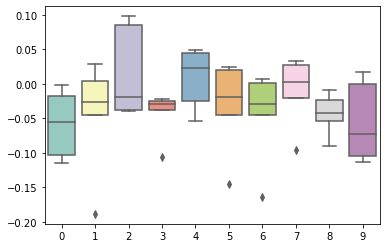

In [22]:
ax = sns.boxplot( data=df.transpose(), palette="Set3")

In [32]:
sorted_feature_importance_list[1][2] 

array([121, 143, 155, 106, 135, 147, 115,  98, 342,  47, 130,  92,  69,
        70, 140,  86,   8, 127, 133, 157, 290, 114, 153, 295, 399, 146,
       326,  53, 367,  62,  93,  24, 306, 105, 111,  79, 154, 394, 278,
       393, 131, 366, 353, 305, 144,  82, 118, 162, 142, 260, 321, 325,
        42,  54, 408,  84, 286,  23,  32,  65,  96, 336,  37, 371, 241,
         3,  17, 178, 343, 364, 148, 132, 375, 298,  45, 368, 221,  91,
       361, 275,  29,  31, 328, 355, 374, 215,  94, 123, 122, 376, 254,
       324, 363, 103, 319, 358,  49, 104,  87,  77, 145, 109, 270, 152,
       167,  97,  55, 158, 156,  63, 346,  20,  41, 349,  64,  16,  74,
       137, 119, 413, 266, 310, 141, 345, 304,  43, 421, 284, 276, 338,
        67,  50,  38, 150, 112, 138, 160,  73, 243, 233, 161, 225, 239,
        40, 291, 318, 425,  99, 256, 110, 279, 232, 126,  60, 327, 331,
        21, 392, 323,  39, 397, 372,  22, 420, 250,  95, 107, 347, 386,
        75, 404,   0, 308, 273,  56, 282, 424,  61, 378,  19, 34

In [23]:
labels = df_eco.columns.values
index = np.argwhere(labels=='FIPS')
labels = np.delete(labels, index)
index = np.argwhere(labels=='IFR')
labels = np.delete(labels, index)
labels = labels.tolist()
print(len(labels))
labels

336


['unclassified_indoor_fungi',
 'k__Fungi.p__Ascomycota.c__Eurotiomycetes.o__Eurotiales.f__Trichocomaceae.g__Aspergillus_indoor',
 'k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Capnodiales.f__Incertae.sedis.g__Toxicocladosporium_indoor',
 'k__Fungi.p__Ascomycota.c__unidentified.o__unidentified.f__unidentified.g__unidentified_indoor',
 'k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Incertae.sedis.g__Phoma_indoor',
 'k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__Pleosporaceae.g__Alternaria_indoor',
 'k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Dothideales.f__Dothioraceae.g__Aureobasidium_indoor',
 'k__Fungi.p__Basidiomycota.c__Microbotryomycetes.o__Sporidiobolales.f__Incertae.sedis.g__Sporobolomyces_indoor',
 'k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Pleosporales.f__unidentified.g__unidentified_indoor',
 'k__Fungi.p__Basidiomycota.c__Tremellomycetes.o__Filobasidiales.f__Filobasidiaceae.g__Cryptococcus_indoor',
 'k__Fungi.p__Ascomycota.c__Dothideomycetes.

In [24]:
def rank(*lists):
    d = dict()
    counts = dict()
    for i in range(0, 10):
        for j in range(0, 5):
            count = 1
            #for e in sorted_feature_importance_list[i][j]:
            for k in range(0, len(sorted_feature_importance_list[i][j])):
                e = sorted_feature_importance_list[i][j][k]
                if e in d: 
                    d[e] += k
                    counts[e] += 1
                else: 
                    if(type(e) is str):
                        print("key "+str(e))
                    d[e] = k
                    counts[e] = 1
                count = count + 1
    #print(d)
    
    for key in d:
        d[key] = d[key] / counts[key]
    
    for key in d:
        if(type(key) is str):
            print("key "+str(key))
            print(d[key])
    #for key in labels:    
    #     if(type(key) is str):
    #        print("key "+str(key))
     
    missing = 0
    final_d = dict()
    for key in d:
        if(type(key) is str):
            #print("key "+str(key))
            #print(d[key])
            missing += 1
        else:
            #print("key "+str(key))
            #print("d[key] "+str(d[key]))        
            #print("key and len "+str(key)+"\t"+str(len(labels)))
            #print("label "+labels[key])        
            final_d[labels[key]] = d[key]            
            #del d[key]
    print(missing)    
    #remove items by key condition
    #d = {key:val for key, val in d.items() if type(key) != str}            
        
    return final_d


ranks = rank(sorted_feature_importance_list)
#ranks
#labels[ranks]

0


In [25]:
ranks.values()

dict_values([120.48, 140.3, 78.4, 97.52, 62.86, 159.86, 160.66, 135.92, 79.32, 115.76, 241.4, 119.52, 140.54, 111.18, 100.08, 178.8, 167.68, 105.38, 178.0, 135.24, 202.76, 95.9, 189.6, 184.2, 190.5, 85.4, 133.08, 124.74, 94.4, 192.32, 151.06, 129.38, 143.5, 110.5, 186.26, 137.12, 72.96, 153.52, 158.58, 221.56, 90.36, 76.64, 135.58, 170.9, 175.6, 250.02, 142.04, 85.72, 107.16, 148.54, 119.14, 123.36, 132.32, 121.74, 128.92, 196.2, 138.66, 89.3, 208.9, 127.44, 183.18, 113.18, 129.56, 167.52, 129.02, 217.14, 122.14, 162.92, 197.0, 159.68, 111.74, 116.42, 184.82, 101.42, 169.9, 171.4, 96.28, 228.12, 162.28, 153.52, 79.62, 156.44, 127.0, 183.74, 184.54, 155.4, 159.24, 173.24, 209.02, 223.46, 170.34, 194.5, 153.46, 149.28, 176.66, 168.56, 178.38, 189.82, 166.06, 185.96, 82.86, 216.06, 265.78, 153.74, 150.6, 125.06, 166.76, 190.84, 210.42, 155.9, 159.72, 131.72, 123.52, 179.36, 154.74, 170.38, 117.6, 162.48, 147.3, 268.26, 190.04, 201.9, 171.72, 207.12, 224.38, 193.86, 205.28, 215.76, 135.92,

In [26]:
{k: v for k,v in sorted(ranks.items(), key=itemgetter(1))}

NameError: name 'itemgetter' is not defined

In [27]:
ranks_df = pd.DataFrame(ranks.items(), columns=['taxa', 'rank'])

In [28]:
ranks_df

,taxa,rank
0,k__Bacteria.p__Actinobacteria.c__Actinobacteri...,120.48
1,k__Bacteria.p__Proteobacteria.c__Alphaproteoba...,140.30
2,k__Bacteria.p__Proteobacteria.c__Alphaproteoba...,78.40
3,k__Bacteria.p__Proteobacteria.c__Alphaproteoba...,97.52
4,k__Bacteria.p__Actinobacteria.c__Actinobacteri...,62.86
...,...,...
331,k__Bacteria.p__Actinobacteria.c__Actinobacteri...,320.92
332,k__Bacteria.p__Bacteroidetes.c__Flavobacteriia...,330.12
333,k__Bacteria.p__Proteobacteria.c__Alphaproteoba...,247.14
334,k__Bacteria.p__Proteobacteria.c__Alphaproteoba...,297.10


In [29]:
ranks_df.sort_values(by='rank', ascending=True)[-50:].to_csv("top50_features_ranks.tsv", sep="\t")

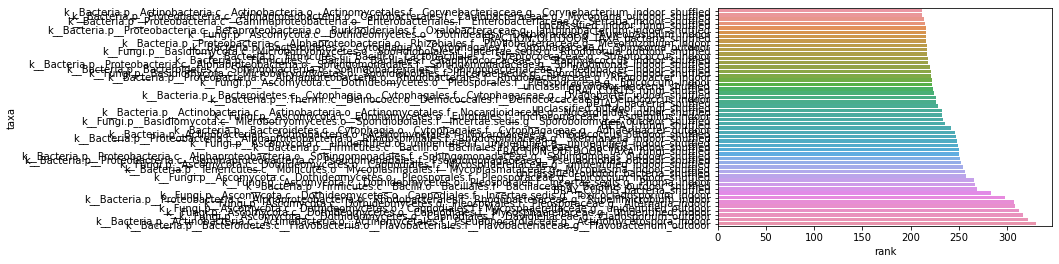

In [30]:
sns.barplot(data=ranks_df.sort_values(by='rank', ascending=True)[-50:], x='rank', y='taxa')

In [36]:
ranks_df.sort_values(by='rank', ascending=True)[-50:]['taxa'].values


array(['k__Bacteria.p__Actinobacteria.c__Actinobacteria.o__Actinomycetales.f__Corynebacteriaceae.g__Corynebacterium_indoor_shuffled',
       'k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Caulobacterales.f__Caulobacteraceae.g__Mycoplana_outdoor_shuffled',
       'k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacteriales.f__Enterobacteriaceae.g__Serratia_indoor_shuffled',
       'unclassified_indoor_fungi_shuffled',
       'k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Burkholderiales.f__Oxalobacteraceae.g__Janthinobacterium_indoor_shuffled',
       'k__Fungi.p__Ascomycota.c__Dothideomycetes.o__Dothideales.f__Dothioraceae.g__Aureobasidium_indoor',
       'FRACTION_OUTDOOR_TAXA_bacteria_shuffled',
       'k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhizobiales.f__Phyllobacteriaceae.g__Mesorhizobium_indoor',
       'k__Bacteria.p__Bacteroidetes.c__Cytophagia.o__Cytophagales.f__Cytophagaceae.g__Spirosoma_outdoor',
       'k__Fungi.p__Basidiomy